<a href="https://colab.research.google.com/github/Omar-Karimov/Time_Series_Analysis/blob/master/Rolling_and_Expanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import base libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web  # to get data

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:
# Get the Apple stock data from Yahoo Finance
df = web.get_data_yahoo("AAPL",start = "2011-01-01",end = "2020-07-17")

In [ ]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,47.180000,46.405716,46.520000,47.081429,111284600.0,40.758278
2011-01-04,47.500000,46.878571,47.491428,47.327145,77270200.0,40.970993
2011-01-05,47.762856,47.071430,47.078571,47.714287,63879900.0,41.306126
2011-01-06,47.892857,47.557144,47.817142,47.675713,75107200.0,41.272743
2011-01-07,48.049999,47.414288,47.712856,48.017143,77982800.0,41.568314


In [ ]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [ ]:
# We will use just Close price, drop other columns.
df.drop(["High", "Low", "Open","Volume", "Adj Close"],1,inplace= True)

In [ ]:
# General information about DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2401 entries, 2011-01-03 to 2020-07-17
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2401 non-null   float64
dtypes: float64(1)
memory usage: 37.5 KB


Text(0, 0.5, 'Price')

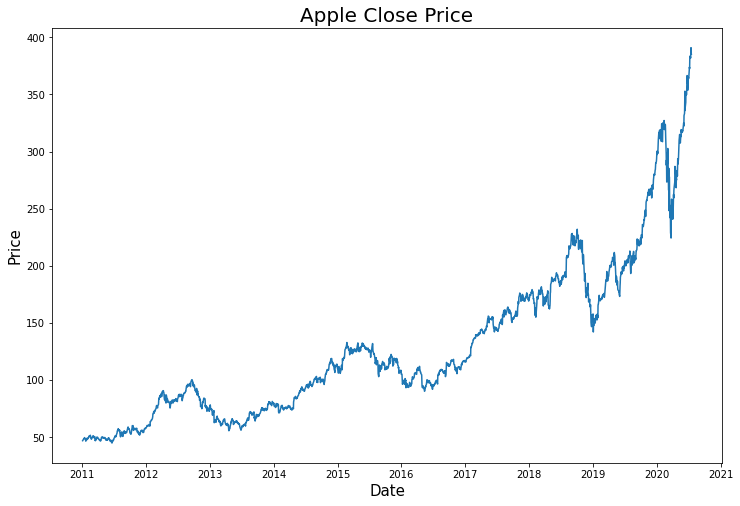

In [ ]:
# Visualizing
plt.figure(figsize = (12,8))
plt.plot(df['Close'])
plt.title("Apple Close Price", fontsize= (20))
plt.xlabel("Date",fontsize=(15))
plt.ylabel("Price",fontsize = (15))

#Now let's add in a rolling mean.

In [ ]:
# 20 day rolling mean
df.rolling(window=20).mean().head(25)

,Close
Date,
2011-01-03,NaN
2011-01-04,NaN
2011-01-05,NaN
2011-01-06,NaN
2011-01-07,NaN
2011-01-10,NaN
2011-01-11,NaN
2011-01-12,NaN
2011-01-13,NaN


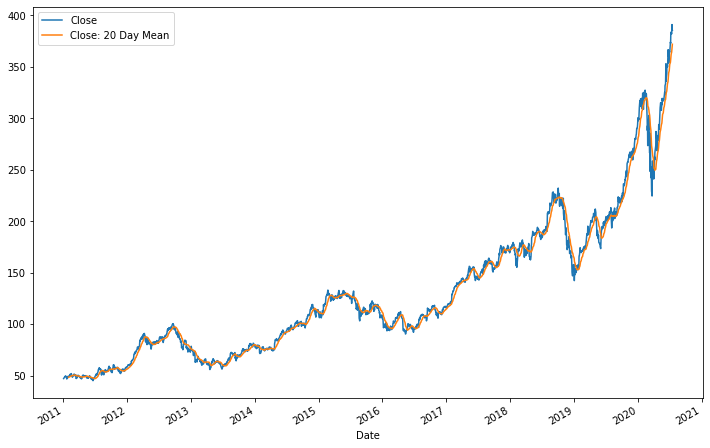

In [ ]:
# Visualizing MA
df["Close: 20 Day Mean"] = df["Close"].rolling(window=20).mean()
df[["Close","Close: 20 Day Mean"]].plot(figsize=(12,8));

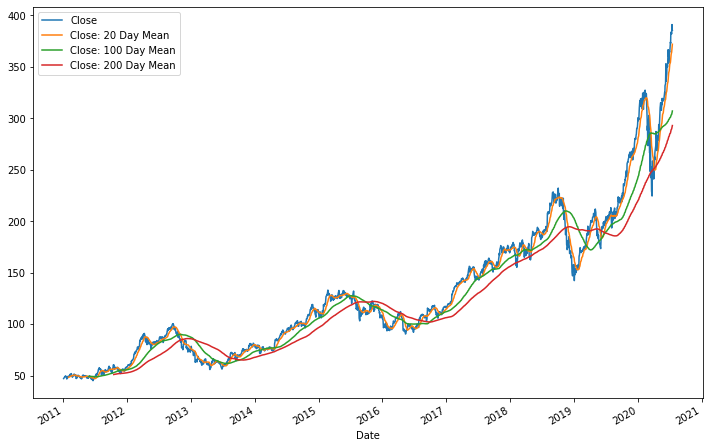

In [ ]:
# MA100 and MA200
# The easiest way to add a legend is to make the rolling values a new columns.
df["Close: 100 Day Mean"] = df["Close"].rolling(window=100).mean()
df["Close: 200 Day Mean"] = df["Close"].rolling(window=200).mean()
df[["Close","Close: 20 Day Mean","Close: 100 Day Mean","Close: 200 Day Mean"]].plot(figsize=(12,8));

# Expanding

In [ ]:
# Expanding take into account everything from the start of the time series up to each point in time.
df["EX"] = df['Close'].expanding().mean()

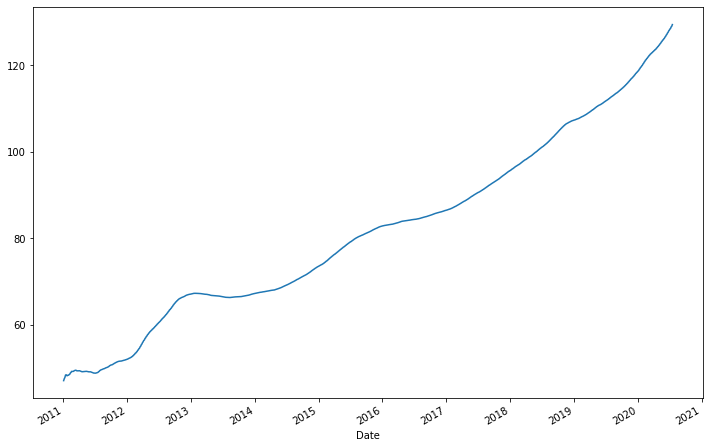

In [ ]:
# Clearly can see uptrend
df["EX"].plot(figsize = (12,8));

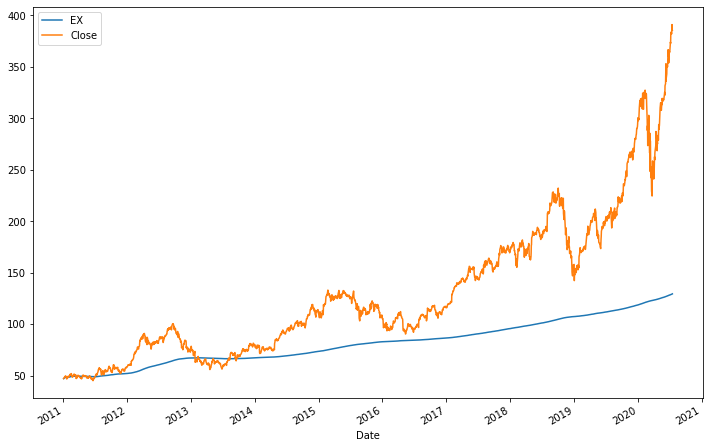

In [ ]:
df[["EX","Close"]].plot(figsize = (12,8));